In [17]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pearson, jsd = [], []
for fold in ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']:
    for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
        with open(f'/DATA/users/m.magnitov/hap_phen/chromBPNet/model/{fold}/model/{sample}/evaluation/{sample}_chrombpnet_metrics.json', 'r') as file:
            model_data = json.load(file)
            #print(model_data)
            pearson.append(model_data['counts_metrics']['peaks']['pearsonr'])
            jsd.append(model_data['profile_metrics']['peaks']['median_jsd'])

In [52]:
pearson = pd.DataFrame(np.reshape(pearson, (5, 5)))
pearson.columns = ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']
pearson.index = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
pearson

,NA12878,NA18983,HG01241,HG02601,HG03464
fold0,0.747675,0.726488,0.773901,0.753688,0.726932
fold1,0.738364,0.707637,0.770216,0.745645,0.716539
fold2,0.746484,0.731960,0.785245,0.759776,0.738645
fold3,0.732233,0.704550,0.758429,0.745827,0.717614
fold4,0.750239,0.720981,0.778921,0.765899,0.737259


In [53]:
jsd = pd.DataFrame(np.reshape(jsd, (5, 5)))
jsd.columns = ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']
jsd.index = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
jsd

,NA12878,NA18983,HG01241,HG02601,HG03464
fold0,0.655497,0.607770,0.669172,0.671328,0.601060
fold1,0.659468,0.614304,0.673621,0.676783,0.608005
fold2,0.655709,0.614037,0.672007,0.674419,0.606543
fold3,0.651639,0.606272,0.669388,0.674481,0.599113
fold4,0.647848,0.601212,0.659213,0.674311,0.600869


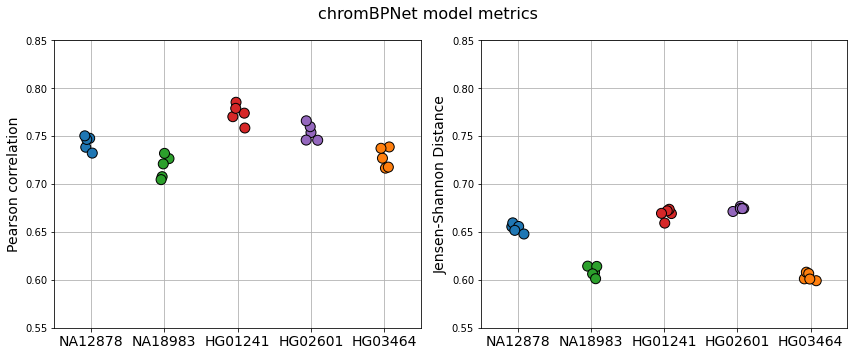

In [100]:
plt.figure(figsize = (12, 5))
plt.suptitle('chromBPNet model metrics', fontsize = 16)

plt.subplot(121)
sns.stripplot(data = [pearson['NA12878'], pearson['NA18983'], pearson['HG01241'], pearson['HG02601'], pearson['HG03464']],
              s = 10, edgecolor = 'k', linewidth = 1, palette = ['C0', 'C2', 'C3', 'C4', 'C1'])
plt.xticks(np.arange(5), ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 14)
plt.ylabel('Pearson correlation', fontsize = 14)
plt.yticks(np.arange(0.5, 1, 0.05))
plt.ylim((0.55, 0.85))
plt.grid()

plt.subplot(122)
sns.stripplot(data = [jsd['NA12878'], jsd['NA18983'], jsd['HG01241'], jsd['HG02601'], jsd['HG03464']],
              s = 10, edgecolor = 'k', linewidth = 1, palette = ['C0', 'C2', 'C3', 'C4', 'C1'])
plt.xticks(np.arange(5), ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 14)
plt.ylabel('Jensen-Shannon Distance', fontsize = 14)
plt.yticks(np.arange(0.5, 1, 0.05))
plt.ylim((0.55, 0.85))
plt.grid()

plt.tight_layout()
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/chrombpnet_metrics.pdf', bbox_inches = 'tight')
plt.show()